In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline
import warnings

import string
warnings.filterwarnings("ignore")

from nltk.tokenize import sent_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# dowloading packages using the following commands
import nltk
nltk.download('punkt')
#this is nltk stopword collection
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Loading the the data set from excel
df = pd.read_excel("C:/Users/aswin/OneDrive/SimplyAnalytics/WordCloud/SMSDataset.xlsx")

In [4]:
#Viewing the loaded dataframe
df

,Text,Classification
0,Urgent! call 09061749602 from Landline. Your c...,Spam
1,+449071512431 URGENT! This is the 2nd attempt ...,Spam
2,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,Spam
3,Urgent! call 09066612661 from landline. Your c...,Spam
4,WINNER!! As a valued network customer you have...,Spam
5,okmail: Dear Dave this is your final notice to...,Spam
6,07732584351 - Rodger Burns - MSG = We tried to...,Spam
7,URGENT! This is the 2nd attempt to contact U!U...,Spam
8,Congrats! Nokia 3650 video camera phone is you...,Spam
9,Urgent! Please call 0906346330. Your ABTA comp...,Spam


In [182]:
# Filtering it for Spam messages only
df2 = df.Classification.str.contains('Spam')
df3 = df[df2]
df3

df3['Text'] = df3['Text'].str.replace('\d+', '')

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","£"]

for char in spec_chars:
    df3['Text'] = df3['Text'].str.replace(char, "") 

df3['Text']=df3['Text'].str.lower()
df3['Text']=df3['Text'].str.strip()
df3

# Using nltk stop words to filter it
stop_words = stopwords.words('english')
stop_words.append('landline')
stop_words.remove('won')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [183]:
from nltk.corpus import wordnet

resultList=[]

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    tokens = nltk.word_tokenize(sentence)
    tokensNew = []
    for word in tokens:
        # replacing words in the documents
        word = re.sub(r'\btxt\b', 'text', word)
        word = re.sub(r'\bmsg\b', 'message', word)
        word = re.sub(r'\bur\b', 'your', word)
        tokensNew.append(word)
    nltk_tagged = nltk.pos_tag(tokensNew)  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        #print("tag: " ,tag)
        if word not in stop_words:
            if tag is None:
                #if there is no available tag, append the token as is
                lemmatized_sentence.append(word)
            else:        
                #else use the tag to lemmatize the token
                lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    resultList.append(' '.join(lemmatized_sentence))
    return " ".join(lemmatized_sentence)

import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return lemmatize_sentence(text)

df3['text_lemmatized'] = df3.Text.apply(lemmatize_text)
df3

,Text,Classification,text_lemmatized
0,urgent call from landline your complimentary ...,Spam,urgent call complimentary tenerife holiday cas...
1,urgent this is the nd attempt to contact uu ha...,Spam,urgent nd attempt contact uu win call b tcsbcm...
2,free for st week no nokia tone ur mob every w...,Spam,free st week nokia tone mob every week text no...
3,urgent call from landline your complementary ...,Spam,urgent call complementary tenerife holiday cas...
4,winner as a valued network customer you have b...,Spam,winner value network customer select receivea ...
5,okmail dear dave this is your final notice to ...,Spam,okmail dear dave final notice collect tenerife...
6,rodger burns msg we tried to call you re you...,Spam,rodger burn message try call reply sm free nok...
7,urgent this is the nd attempt to contact uu ha...,Spam,urgent nd attempt contact uu win call b tcsbcm...
8,congrats nokia video camera phone is your cal...,Spam,congrats nokia video camera phone call call co...
9,urgent please call your abta complimentary s...,Spam,urgent please call abta complimentary spanish ...


In [184]:
filteredList = ' '.join([str(elem) for elem in resultList]) 
result = nltk.word_tokenize(filteredList)
print(result)

['urgent', 'call', 'complimentary', 'tenerife', 'holiday', 'cash', 'await', 'collection', 'sae', 'tc', 'box', 'hp', 'yf', 'ppm', 'urgent', 'nd', 'attempt', 'contact', 'uu', 'win', 'call', 'b', 'tcsbcmwcnxx', 'callcost', 'ppm', 'mobilesvary', 'max', 'free', 'st', 'week', 'nokia', 'tone', 'mob', 'every', 'week', 'text', 'nokia', 'get', 'txting', 'tell', 'mate', 'wwwgetzedcouk', 'pobox', 'wwq', 'normptone', 'urgent', 'call', 'complementary', 'tenerife', 'holiday', 'cash', 'await', 'collection', 'sae', 'tc', 'po', 'box', 'wa', 'px', 'ppm', 'sender', 'hol', 'offer', 'winner', 'value', 'network', 'customer', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hour', 'okmail', 'dear', 'dave', 'final', 'notice', 'collect', 'tenerife', 'holiday', 'cash', 'award', 'call', 'tc', 'sae', 'box', 'cwwx', 'ppm', 'rodger', 'burn', 'message', 'try', 'call', 'reply', 'sm', 'free', 'nokia', 'mobile', 'free', 'camcorder', 'please', 'call', 'delivery', 'tomorrow', 'urg

In [185]:
#Applying tf-idf Vectorizer from sklearn package
vectorizer = TfidfVectorizer(stop_words = stop_words)
vectors = vectorizer.fit_transform(df3['text_lemmatized'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df1 = pd.DataFrame(denselist, columns=feature_names)
df1

,ab,abta,access,accommodationvouchers,accordingly,account,aclpm,acoentry,action,activate,...,yesterday,yf,youre,youto,youve,yr,yrs,zed,zf,zouk
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.390102,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.339491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [186]:
terms = vectorizer.get_feature_names()

# sum tfidf frequency of each term through documents
sums = vectors.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
#print(ranking.sort_values('rank', ascending=False))
ranking = ranking.sort_values('rank', ascending=False)
ranking

,term,rank
101,call,20.087207
1017,win,13.665771
892,text,13.426717
298,free,12.784724
686,prize,12.773926
140,claim,12.111272
520,mobile,11.346095
964,urgent,8.983965
169,contact,8.856783
51,award,7.832134


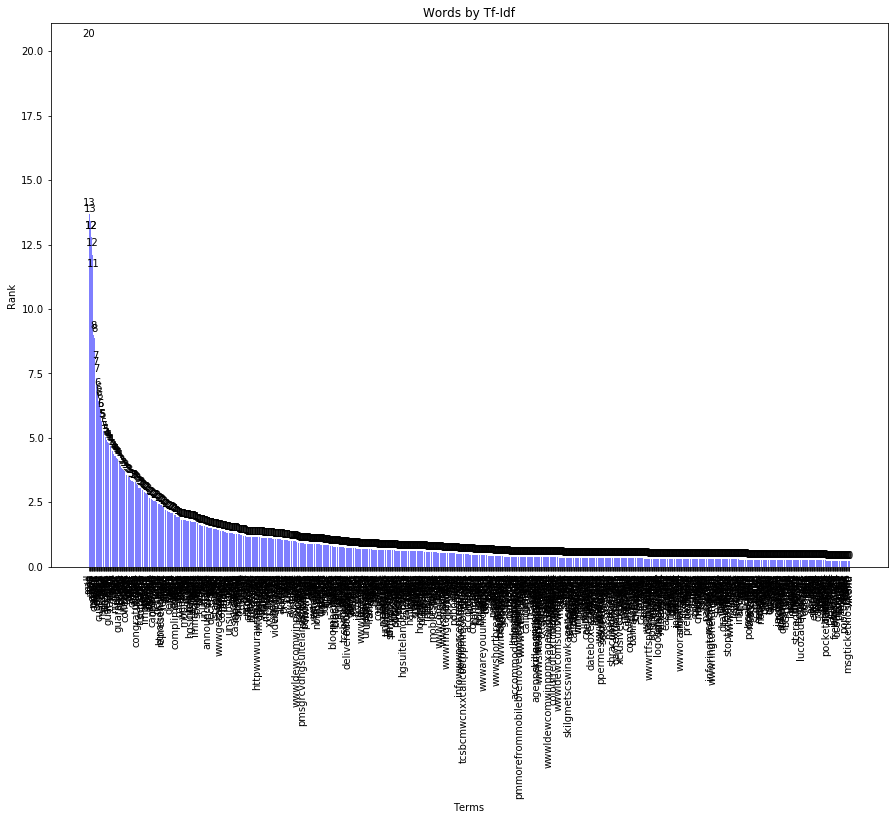

In [187]:
#Plotting it to bar plot 

#Defining chart size
fig, ax = plt.subplots(figsize=(15,10))
rects = plt.bar(ranking['term'], ranking['rank'], align='center', alpha=0.5, color = 'blue')
plt.xticks(rotation = 90)
ax.set_title("Words by Tf-Idf")
ax.set_xlabel("Terms")
ax.set_ylabel("Rank")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2, 1.02*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects)

plt.show()

In [188]:
#Using Count Vector to covert the string to matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(result)

#Creating dataframe with the string values and count of them
dataframe = pd.DataFrame(np.sum(X, axis=0), columns=vectorizer.get_feature_names(), index =['count'])
dataframe

# Transposing the dataframe created
dataframe_transposed = dataframe.T
dataframe_transposed

# Sorting the dataframe based on the mostly used words to least used words
dataframe_sorted = dataframe_transposed.sort_values(by=['count'], ascending=False)
dataframe_sorted.index.name = 'word'
dataframe_sorted = dataframe_sorted.reset_index()
dataframe_sorted

# Taking only the first 10 values for plotting
dataframe_final = dataframe_sorted.head(10)
dataframe_final

,word,count
0,call,184
1,text,117
2,free,89
3,win,82
4,mobile,70
5,claim,67
6,prize,65
7,nokia,41
8,urgent,41
9,contact,40


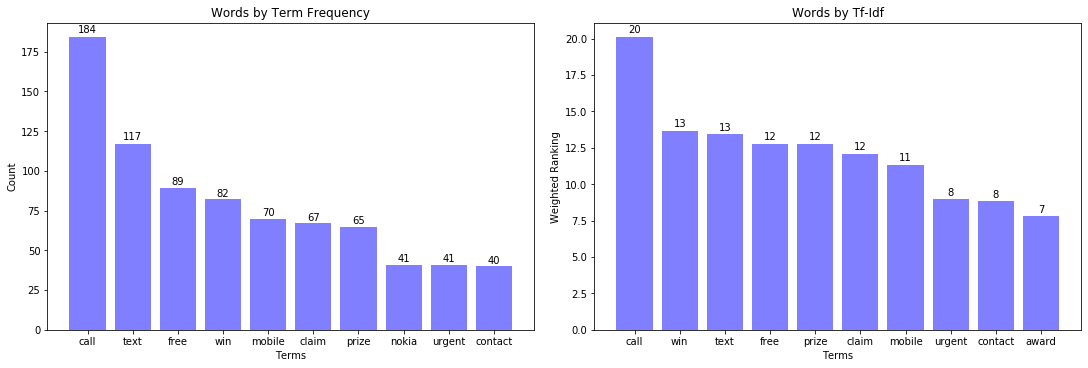

In [189]:
rankingFew = ranking.head(10)

#Plotting it to bar plot 
fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(15,5))

rects1 = axs[0].bar(dataframe_final['word'], dataframe_final['count'], align='center', alpha=0.5, color = 'blue')
axs[0].set_title("Words by Term Frequency")
axs[0].set_xlabel("Terms")
axs[0].set_ylabel("Count")

for rect in rects1:
        height = rect.get_height()
        axs[0].text(rect.get_x()+rect.get_width()/2, 1.01*height, '%d'%int(height),ha='center', va='bottom')

rects2 = axs[1].bar(rankingFew['term'], rankingFew['rank'], align='center', alpha=0.5, color = 'blue')

for rect in rects2:
        height = rect.get_height()
        axs[1].text(rect.get_x()+rect.get_width()/2, 1.01*height, '%d'%int(height),ha='center', va='bottom')
        
#plt.xticks(rotation = 45)
axs[1].set_title("Words by Tf-Idf")
axs[1].set_xlabel("Terms")
axs[1].set_ylabel("Weighted Ranking")

plt.show()